C&S 5.3c Simultaneous solution of ODE's for PFR reacator with fluid properties a function of temperature

Solving C&S5.3c:  $F_T=constant=38.3 mol/s$ with $F_N=38.3-F_{A0}$ so $F_{A0}=10, 20, 30, 35, 38.3 mol/s.$
$$\frac{dF_A}{dV}=r_A$$
$$\frac{dF_B}{dV}=r_B$$
$$\frac{dF_C}{dV}=r_C$$
$$\color{red}{\frac{dX_A}{dV}=-r_A / F_{A0}}$$
$$r_A=-kC_A[=]mol/m^3/s$$
$$C_A=\frac{y_AP}{RT}$$
$$lnk=34.34-\frac{34222K}{T}[=]s^{-1}$$

$$\frac{dT}{dV}=\frac{r_A\Delta H_{rxn_i}}{\sum_{n=1}^{4}F_iC_{p_i}}$$
$$∆H_{rxn}=80770+6.8T-298 - 0.00575T^2- 2982-1.27×10^{-6}T^3-2983[=]J/molA$$
$$C_{pA}=26.6+0.183T-45.86\times{10}^{-6}T^2[=]Jmol/K$$
$$C_{pB}=20.04+0.0945T-30.95\times{10}^{-6}T^2$$
$$C_{pC}=13.39+0.077T-18.71\times{10}^{-6}T^2$$
$$C_{pN}=6.25+0.00878T-2.1\times{10}^{-8}T^2$$
The reactor has a volume of $4 m^3$ and the initial values are $T_0=1035K$, $P_0=162kPa$ and $F_{A0}=38.3 mol/s$.


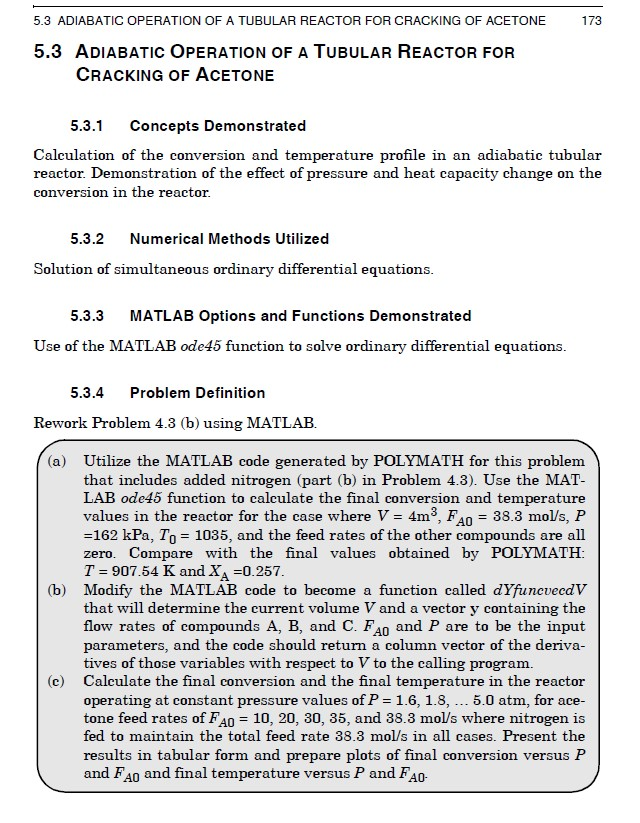

# instead of MATLAB this will be done using python

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

# In the ODEfun below we have added 2 additional inputs to the function definition. <br>
These are FA0 and P.<br>def  ODEfun(V,Yfuncvec,FA0,P) <BR> 
In the Solver_ivp call you will need to add args=(FA0,P)<br>
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,args=(FA0,P))

In [6]:
#This function is to return the values of the 4 derivatives C&S5.3c
def  ODEfun(V,Yfuncvec,FA0,P):#fun(t,y) and return dy/dt
    FA = Yfuncvec[0]
    FB = Yfuncvec[1]
    FC = Yfuncvec[2] 
    T = Yfuncvec[3]
    X = Yfuncvec[4]

    #FA0 Feed rate of acetone in kg-mol/s 

    k = 820000000000000 * np.exp(-34222 / T) #Reaction rate constant in s-1

    XA = (FA0 - FA) / FA0 #Conversion of acetone 

    FN = 38.3 - FA0 #Feed rate of nitrogen in kg-mol/s 

    # P Pressure kPa 

    yA = FA / (FA + FB + FC + FN) #Mole fraction of acetone 

    CA = yA * P * 1000 / (8.31 * T) #Concentration of acetone in k-mol/m3 

    yB = FB / (FA + FB + FC + FN) #Mole fraction of ketene 

    yC = FC / (FA + FB + FC + FN) #Mole fraction of methane 

    rA = 0 - (k * CA) #Reaction rate in kg-mole/m3-s
    #Heat of reaction in J/mol-K 
    deltaH = 80770 + 6.8 * (T - 298) - (0.00575 * (T ** 2 - (298 ** 2))) - (0.00000127 * (T ** 3 - (298 ** 3))) 

    CpA = 26.6 + 0.183 * T - (0.00004586 * T ** 2) #Heat capacity of acetone in J/mol-K 

    CpB = 20.04 + 0.0945 * T - (0.00003095 * T ** 2) #Heat capacity of ketene in J/mol-K 

    CpC = 13.39 + 0.077 * T - (0.00001871 * T ** 2) #Heat capacity of methane in J/mol-K

    CpN = 6.25 + 0.00878 * T - (0.000000021 * T ** 2) #Heat capacity of nitrogen in J/mol-K 

    dFAdV = rA #Differential mass balance on acetone 

    dFBdV = 0 - rA #Differential mass balance on ketene

    dFCdV = 0 - rA #Differential mass balance on methane 

    dTdV = (0 - deltaH) * (0 - rA) / (FA * CpA + FB * CpB + FC * CpC + FN * CpN)#Differential enthalpy balance  
    
    dXdV = -rA/FA0 
   
    dYfuncvecdV = [dFAdV, dFBdV, dFCdV, dTdV, dXdV] 
    return dYfuncvecdV 


In [7]:
#test of function dFA/dV=rA etc.
tspan = (0,4.) # Range for the independent variable 
y0 = [10., 0, 0, 1035.,0] # Initial values for the dependent variables
sol=ODEfun(tspan,y0,10.,162.)
print (sol)

[-17.609907206409247, 17.609907206409247, 17.609907206409247, -659.7507675868354, 1.7609907206409248]


In [16]:
#test of print function 
numrows=21
tspan = (0,4.) # Range for the independent variable 
teval=np.linspace(tspan[0],tspan[1],numrows)
FA0=10.
P=162.
y0 = [FA0, 0, 0, 1035.,0] # Initial values for the dependent variables

sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,args=(FA0,P))

print('Solution ')
print('    V         FA         FB        FC      T     XA')
print('  (m^3)    (mol/s)   (mol/s)    (mol/s)   (K)    ')

row=0
for row in range(numrows):
    print('{:4.4f} {:10.4f} {:10.4f} {:10.4f} {:6.0f} {:6.3f}'.format(sol.t[row],sol.y[0][row],sol.y[1][row],sol.y[2][row],sol.y[3][row],sol.y[4][row]))

Solution 
    V         FA         FB        FC      T     XA
  (m^3)    (mol/s)   (mol/s)    (mol/s)   (K)    
0.0000    10.0000     0.0000     0.0000   1035  0.000
0.2000     8.7058     1.2942     1.2942    986  0.129
0.4000     8.2815     1.7185     1.7185    969  0.172
0.6000     8.0264     1.9736     1.9736    959  0.197
0.8000     7.8459     2.1541     2.1541    952  0.215
1.0000     7.7063     2.2937     2.2937    946  0.229
1.2000     7.5920     2.4080     2.4080    941  0.241
1.4000     7.4967     2.5033     2.5033    938  0.250
1.6000     7.4151     2.5849     2.5849    934  0.258
1.8000     7.3433     2.6567     2.6567    931  0.266
2.0000     7.2789     2.7211     2.7211    929  0.272
2.2000     7.2207     2.7793     2.7793    926  0.278
2.4000     7.1681     2.8319     2.8319    924  0.283
2.6000     7.1201     2.8799     2.8799    922  0.288
2.8000     7.0760     2.9240     2.9240    921  0.292
3.0000     7.0353     2.9647     2.9647    919  0.296
3.2000     6.9974     3.

In [5]:
print(len(y0))


5


In [6]:
print (sol.t[99])

4.0


In [7]:
teval=np.linspace(tspan[0],tspan[1])
print(teval)

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]


Text(0, 0.5, 'Reactor Volume ($m^3$)')

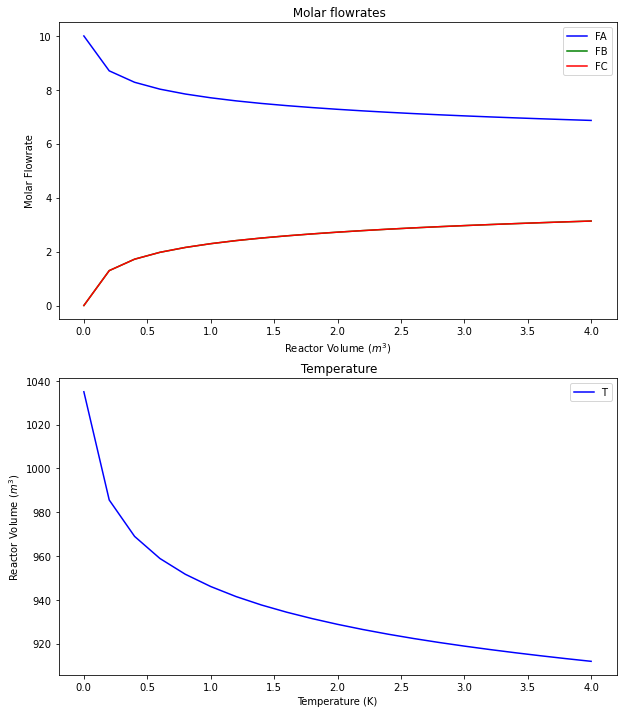

In [17]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'r',label='FC')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[3],'b',label='T')

plt.legend()
plt.title(' Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Reactor Volume ($m^3$)')

In [18]:
#C&S5.3c
FA0set = [10, 20, 30, 35, 38.3] #Feed rate of acetone in kg-mol/s
P_set=np.arange(1.6,5.2,0.2)
n_P = len(P_set)
n_FA0 =len(FA0set)
Xfin=np.zeros((n_P,n_FA0))
Tfin=np.zeros((n_P,n_FA0))

for j in range(len(FA0set)):
           
    FA0=FA0set[j]
    for i in range (n_P):
        P=P_set[i]*101.325 # Pressure in kPa
        y0=[FA0, 0, 0, 1035, 0]
        sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,args=(FA0,P))
        Xfin[i,j]=sol.y[4][-1]
        Tfin[i,j]=sol.y[3][-1]


In [19]:
print('         Final Conversion versus FA0 and Pressure')
print('                     Tabular Results')
print('')
print('Pressure  FA0=10     FA0=20     FA0=30     FA0=35     FA0=38.3 ')
for i in range(len(P_set)):
    print('{:4.4f}{:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'.format(P_set[i], 
                            Xfin[i,0], Xfin[i,1], Xfin[i,2], Xfin[i,3], Xfin[i,4]))

print('\n       Final Temperature versus FA0 and Pressure')
print('                         Tabular Results')
print('Pressure  FA0=10     FA0=20     FA0=30     FA0=35     FA0=38.3 ')
for i in range(len(P_set)):
    print('{:4.4f}{:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'.format(P_set[i], 
                            Tfin[i,0], Tfin[i,1], Tfin[i,2], Tfin[i,3], Tfin[i,4]))


         Final Conversion versus FA0 and Pressure
                     Tabular Results

Pressure  FA0=10     FA0=20     FA0=30     FA0=35     FA0=38.3 
1.6000    0.3134     0.2775     0.2638     0.2595     0.2571
1.8000    0.3203     0.2834     0.2693     0.2649     0.2625
2.0000    0.3264     0.2886     0.2742     0.2697     0.2673
2.2000    0.3318     0.2932     0.2786     0.2741     0.2716
2.4000    0.3368     0.2974     0.2826     0.2780     0.2755
2.6000    0.3413     0.3013     0.2863     0.2816     0.2790
2.8000    0.3454     0.3049     0.2897     0.2849     0.2823
3.0000    0.3493     0.3083     0.2928     0.2880     0.2853
3.2000    0.3529     0.3114     0.2957     0.2908     0.2881
3.4000    0.3563     0.3143     0.2984     0.2934     0.2908
3.6000    0.3595     0.3170     0.3009     0.2960     0.2933
3.8000    0.3625     0.3195     0.3034     0.2983     0.2956
4.0000    0.3653     0.3220     0.3057     0.3006     0.2978
4.2000    0.3680     0.3242     0.3078     0.3027     0

Text(0, 0.5, 'Final Temperature (K)')

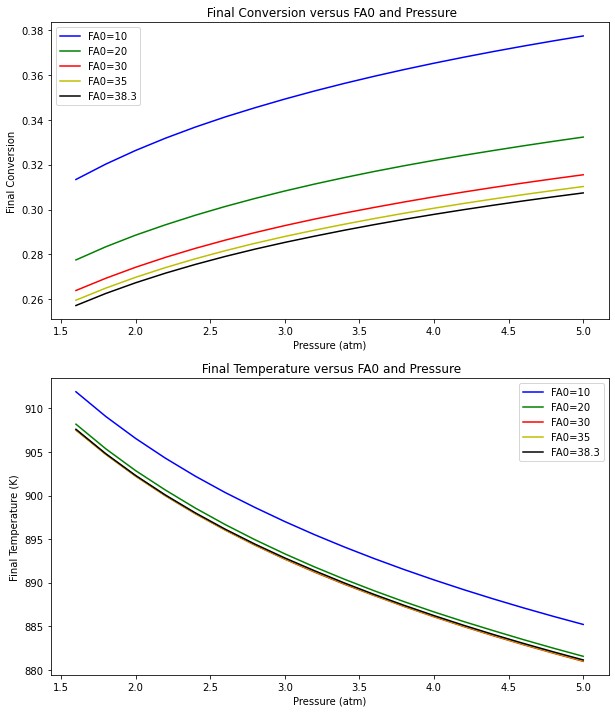

In [20]:
#print plots
#Print Graphs

plt.figure(figsize=(10,12))

plt.subplot (2,1,1)

plt.plot(P_set,Xfin[:,0],'b',label='FA0=10')
plt.plot(P_set,Xfin[:,1],'g',label='FA0=20')
plt.plot(P_set,Xfin[:,2],'r',label='FA0=30')
plt.plot(P_set,Xfin[:,3],'y',label='FA0=35')
plt.plot(P_set,Xfin[:,4],'k',label='FA0=38.3')

plt.legend()
plt.title(' Final Conversion versus FA0 and Pressure')
plt.xlabel('Pressure (atm)')
plt.ylabel('Final Conversion')

plt.subplot (2,1,2)

plt.plot(P_set,Tfin[:,0],'b',label='FA0=10')
plt.plot(P_set,Tfin[:,1],'g',label='FA0=20')
plt.plot(P_set,Tfin[:,2],'r',label='FA0=30')
plt.plot(P_set,Tfin[:,3],'y',label='FA0=35')
plt.plot(P_set,Tfin[:,4],'k',label='FA0=38.3')

plt.legend()
plt.title(' Final Temperature versus FA0 and Pressure')
plt.xlabel('Pressure (atm)')
plt.ylabel('Final Temperature (K)')

In [21]:
print(Tfin)
print(Xfin)
print(Xfin[:,-1])#gives the last column and all the rows
print(Xfin[-1,:])#this gives the last row of all the columns

[[911.90734738 908.19111488 907.51236747 907.52653392 907.60586627]
 [909.07453778 905.36636146 904.73786471 904.73802761 904.80227359]
 [906.55401042 902.8612375  902.23060511 902.23804766 902.30695777]
 [904.2857648  900.63014661 899.97318888 899.9870126  900.0600555 ]
 [902.22734683 898.56773712 897.92125466 897.94091282 898.0179012 ]
 [900.34984315 896.67745316 896.0414206  896.06700618 896.14840826]
 [898.63565832 894.93403737 894.3083055  894.34109541 894.42852079]
 [897.01854269 893.31680787 892.70277676 892.74598406 892.84276054]
 [895.50830838 891.80926543 891.21091665 891.27051825 891.37171645]
 [894.09430041 890.39820034 889.82335943 889.88165105 889.96913076]
 [892.76525781 889.07311464 888.5219034  888.56093031 888.65057532]
 [891.51179746 887.82584762 887.2729194  887.31510105 887.40674856]
 [890.32605128 886.65032175 886.09118691 886.13629614 886.22980772]
 [889.20140714 885.54234449 884.96998115 885.01782383 885.11308908]
 [888.13232478 884.49227616 883.90353383 883.953

In [22]:
print(sol.y[3][-1])
print(sol.y[3])

881.1461893379575
[1035.          953.00497173  935.80874157  925.87310465  918.84496101
  913.4686284   909.14153709  905.46541898  902.28712812  899.51427564
  897.06439985  894.86720648  892.86456858  891.01243064  889.29865799
  887.70938925  886.22873441  884.84285306  883.53995435  882.310297
  881.14618934]
